In [10]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Load files into a pandas dataframe
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
ss = pd.read_csv('./data/SampleSubmission.csv')

# Train Data

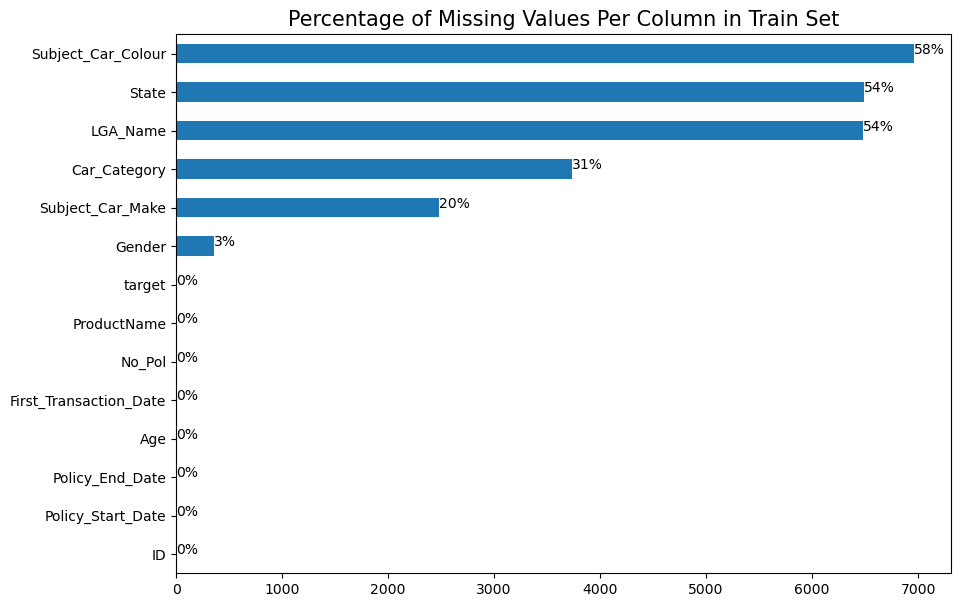

In [12]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [13]:
train['Subject_Car_Make'] = train['Subject_Car_Make'].replace('.', np.nan)

In [14]:
def clean_age(age):
    if pd.isna(age) or age < 0 or age > 100:
        return np.nan
    return age

train['Age'] = train['Age'].apply(clean_age)
train['Age'] = train['Age'].fillna(round(train['Age'].mean(), 0))

In [15]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

mapper = {'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
train.Gender = train.Gender.replace(mapper)

In [16]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])

In [17]:
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30.0,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79.0,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43.0,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2.0,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20.0,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30.0,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59.0,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34.0,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,Male,41.0,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [18]:
train = train.sort_values(by='Policy_Start_Date')
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
8010,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,NaN,NaN,Car Vintage,0
10526,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0
10234,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0
12066,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,NaN,BMW,NaN,NaN,Car Vintage,0
8124,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,NaN,NaN,Tata,Ajah,Lagos,CVTP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,ID_MLGO8DZ,2010-12-31,2011-06-30,Male,51.0,2010-12-31,4,Saloon,Black,Honda,Victoria Island,Lagos,Car Classic,0
1997,ID_62LBOWI,2010-12-31,2011-12-30,Male,44.0,2010-12-31,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,0
11299,ID_XR8F115,2010-12-31,2011-12-30,Male,37.0,2010-12-31,1,JEEP,NaN,Hyundai,NaN,NaN,CarSafe,0
2919,ID_8P2UGYO,2010-12-31,2011-12-30,Male,20.0,2010-12-31,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0


In [20]:
train.isnull().sum()

ID                           0
Policy_Start_Date            0
Policy_End_Date              0
Gender                       0
Age                          0
First_Transaction_Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2520
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [22]:
def backfill_data(data, columns):
    for column in columns:
        data[column] = data[column].fillna(method='bfill')
    return data

backfill_columns = ['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']
    
backfilled_data = backfill_data(train, backfill_columns)

print("Original Data:")
print(train)
print("\nBackfilled Data:")
print(backfilled_data)

backfilled_data.to_csv('./data/backfilled_data.csv', index=False)


Original Data:
               ID Policy_Start_Date Policy_End_Date  Gender   Age  \
8010   ID_O51ZQ1B        2001-12-11      2011-12-10  Female  37.0   
10526  ID_VJ1FAVO        2002-03-25      2011-03-24    Male  37.0   
10234  ID_ULWS8VL        2003-04-13      2011-04-12    Male  41.0   
12066  ID_ZYKGSP7        2003-12-21      2034-05-20    Male  48.0   
8124   ID_OEWBKGF        2005-08-05      2011-09-29  Female  44.0   
...           ...               ...             ...     ...   ...   
7479   ID_MLGO8DZ        2010-12-31      2011-06-30    Male  51.0   
1997   ID_62LBOWI        2010-12-31      2011-12-30    Male  44.0   
11299  ID_XR8F115        2010-12-31      2011-12-30    Male  37.0   
2919   ID_8P2UGYO        2010-12-31      2011-12-30    Male  20.0   
2886   ID_8MNXRC6        2010-12-31      2011-12-16    Male  36.0   

      First_Transaction_Date  No_Pol Car_Category Subject_Car_Colour  \
8010              2001-12-11       1       Saloon              Black   
10526       

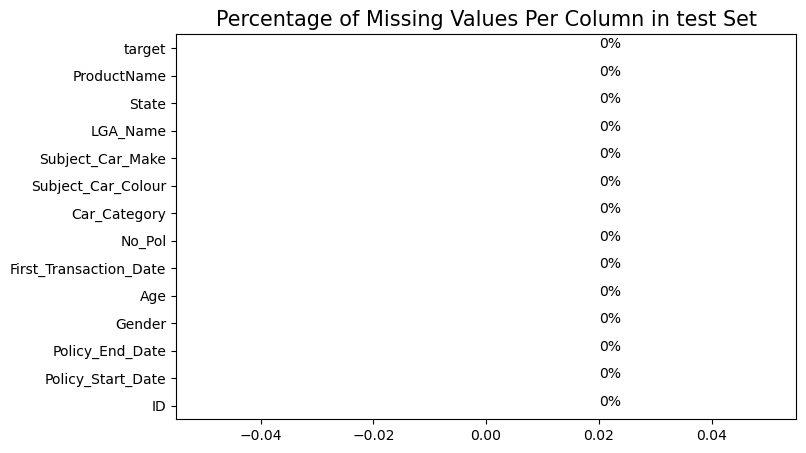

In [23]:
# Check if there any missing values in test set
ax = backfilled_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/backfilled_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# Test Data

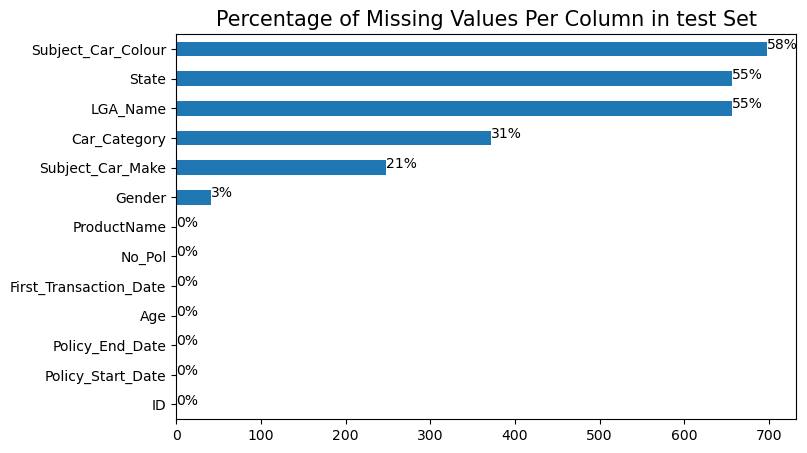

In [24]:
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [25]:
test['Subject_Car_Make'] = test['Subject_Car_Make'].replace('.', np.nan)

In [26]:
def clean_age(age):
    if pd.isna(age) or age < 0 or age > 100:
        return np.nan
    return age

test['Age'] = test['Age'].apply(clean_age)
test['Age'] = test['Age'].fillna(round(test['Age'].mean(), 0))

In [27]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

mapper = {'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
test.Gender = test.Gender.replace(mapper)

In [28]:
test['Policy_Start_Date'] = pd.to_datetime(test['Policy_Start_Date'])

In [29]:
test = test.sort_values(by='Policy_Start_Date')
test

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
195,ID_6JEYVLP,2010-01-01,2010-12-31,Male,35.0,2010-01-01,1,JEEP,NaN,ACURA,NaN,NaN,CarSafe
379,ID_BX1PNZ6,2010-01-01,2011-05-31,Entity,93.0,2010-01-01,7,NaN,As Attached,Honda,Lagos Island,Lagos,CarSafe
248,ID_83NJU2D,2010-01-01,2010-12-31,Male,41.0,2010-01-01,4,NaN,NaN,NaN,Victoria Island,Lagos,Muuve
882,ID_Q6GKOAQ,2010-01-02,2011-01-01,Female,45.0,2010-01-02,1,JEEP,White,Ford,NaN,NaN,Car Classic
1092,ID_WB3E64W,2010-01-02,2011-01-01,Male,66.0,2010-01-02,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,ID_3VAANJU,2010-12-30,2011-12-29,Female,41.0,2010-12-30,1,NaN,NaN,NaN,NaN,NaN,Car Classic
307,ID_A1YSYCA,2010-12-30,2011-12-29,Male,45.0,2010-12-30,1,NaN,NaN,NaN,NaN,NaN,CarSafe
1115,ID_X7F8710,2010-12-31,2011-12-30,Male,38.0,2010-12-31,3,Saloon,Silver,Hyundai,Obia/Akpor,Obia-Akpor,Car Classic
781,ID_MZPS3W5,2010-12-31,2011-07-10,Male,34.0,2010-12-31,1,NaN,As Attached,TOYOTA,Onitsha,Anambra,Car Classic


In [30]:
def backfill_data(data, columns):
    for column in columns:
        data[column] = data[column].fillna(method='bfill')
    return data

backfill_columns = ['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']
    
backfilled_test = backfill_data(test, backfill_columns)

print("Original Data:")
print(test)
print("\nBackfilled Data:")
print(backfilled_test)

backfilled_test.to_csv('./data/backfilled_test.csv', index=False)

Original Data:
              ID Policy_Start_Date Policy_End_Date  Gender   Age  \
195   ID_6JEYVLP        2010-01-01      2010-12-31    Male  35.0   
379   ID_BX1PNZ6        2010-01-01      2011-05-31  Entity  93.0   
248   ID_83NJU2D        2010-01-01      2010-12-31    Male  41.0   
882   ID_Q6GKOAQ        2010-01-02      2011-01-01  Female  45.0   
1092  ID_WB3E64W        2010-01-02      2011-01-01    Male  66.0   
...          ...               ...             ...     ...   ...   
116   ID_3VAANJU        2010-12-30      2011-12-29  Female  41.0   
307   ID_A1YSYCA        2010-12-30      2011-12-29    Male  45.0   
1115  ID_X7F8710        2010-12-31      2011-12-30    Male  38.0   
781   ID_MZPS3W5        2010-12-31      2011-07-10    Male  34.0   
1047  ID_V1RSMQM        2010-12-31      2011-12-30    Male  51.0   

     First_Transaction_Date  No_Pol Car_Category Subject_Car_Colour  \
195              2010-01-01       1         JEEP        As Attached   
379              2010-01-0

In [269]:
backfilled_test

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
195,ID_6JEYVLP,2010-01-01,2010-12-31,Male,35.0,2010-01-01,1,JEEP,As Attached,ACURA,Lagos Island,Lagos,CarSafe
379,ID_BX1PNZ6,2010-01-01,2011-05-31,Other,93.0,2010-01-01,7,JEEP,As Attached,Honda,Lagos Island,Lagos,CarSafe
248,ID_83NJU2D,2010-01-01,2010-12-31,Male,41.0,2010-01-01,4,JEEP,White,Ford,Victoria Island,Lagos,Muuve
882,ID_Q6GKOAQ,2010-01-02,2011-01-01,Female,45.0,2010-01-02,1,JEEP,White,Ford,Victoria Island,Lagos,Car Classic
1092,ID_WB3E64W,2010-01-02,2011-01-01,Male,66.0,2010-01-02,1,Saloon,As Attached,TOYOTA,Victoria Island,Lagos,CarSafe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,ID_3VAANJU,2010-12-30,2011-12-29,Female,41.0,2010-12-30,1,Saloon,Silver,Hyundai,Obia/Akpor,Obia-Akpor,Car Classic
307,ID_A1YSYCA,2010-12-30,2011-12-29,Male,45.0,2010-12-30,1,Saloon,Silver,Hyundai,Obia/Akpor,Obia-Akpor,CarSafe
1115,ID_X7F8710,2010-12-31,2011-12-30,Male,38.0,2010-12-31,3,Saloon,Silver,Hyundai,Obia/Akpor,Obia-Akpor,Car Classic
781,ID_MZPS3W5,2010-12-31,2011-07-10,Male,34.0,2010-12-31,1,NaN,As Attached,TOYOTA,Onitsha,Anambra,Car Classic


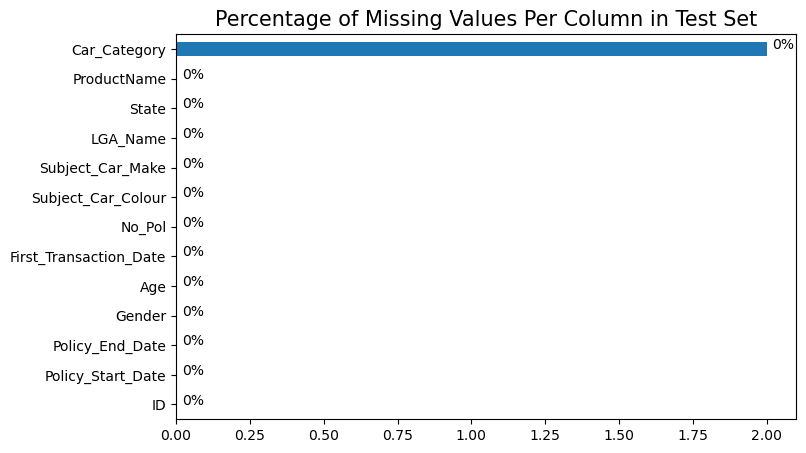

In [32]:
# Check if there any missing values in train set
ax = backfilled_test.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/backfilled_test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))